In [58]:
import json

import cv2
import numpy as np
from codecs import open
# from types import SimpleNamespace for python 3
from collections import namedtuple
from matplotlib import pyplot as plt
from IPython.display import display

In [77]:
# json to obj
def _json_object_hook(d): return namedtuple('X', d.keys())(*d.values())
def json2obj(data): return json.loads(data, object_hook=_json_object_hook)

def print_image(img, title = 'result'):
    copy_img = img.copy()
    copy_img = cv2.cvtColor(copy_img, cv2.COLOR_BGRA2RGBA)
    plt.imshow(copy_img[:,:])
    plt.title(title)
    plt.show()

In [55]:
with open('../samples/frame-message-sample-1.json', 'r', encoding='utf-8') as jsonFile:
    request = json2obj(jsonFile.read())

request

X(sessionId=u'D589C4101B97474F8DDAAD35B5D76CED', attendees=[X(userName=u'\u0412\u0430\u0434\u0438\u043c \u0410\u0440\u0434\u0430\u0441\u043e\u0432', userId=None, height=208, width=369, y=153, x=62), X(userName=u'Angular2222', userId=None, height=216, width=377, y=149, x=431), X(userName=u'Olha Koshlata', userId=None, height=208, width=369, y=365, x=248)], filePath=u'/Users/ardasovvadim/dev/Workspaces/dotnet/SmartGuard/SmartGuar.WebApi.Host/sessions/D589C4101B97474F8DDAAD35B5D76CED/frames/frame_1669141057.jpg')

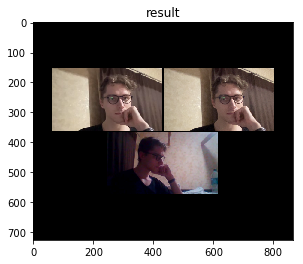

In [78]:
img = cv2.imread(request.filePath)
print_image(img)

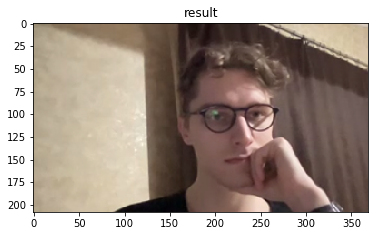

(208, 369, 3)


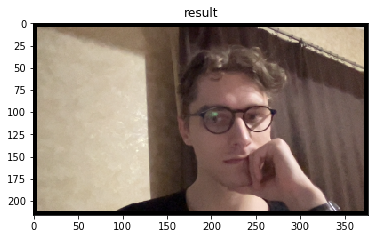

(216, 377, 3)


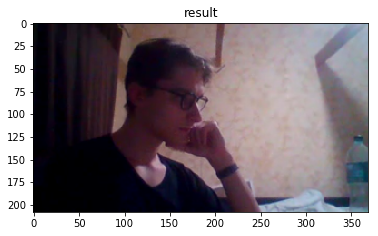

(208, 369, 3)


In [81]:
cimg = img.copy()
attendeeFrames = []

for attendee in request.attendees:
    attendeeImage = cimg[attendee.y:attendee.y + attendee.height,attendee.x:attendee.x+attendee.width,:]
    print_image(attendeeImage)
    attendeeFrames.append(attendeeImage)
    print attendeeImage.shape

In [74]:
request.attendees

[X(userName=u'\u0412\u0430\u0434\u0438\u043c \u0410\u0440\u0434\u0430\u0441\u043e\u0432', userId=None, height=208, width=369, y=153, x=62),
 X(userName=u'Angular2222', userId=None, height=216, width=377, y=149, x=431),
 X(userName=u'Olha Koshlata', userId=None, height=208, width=369, y=365, x=248)]

In [65]:
img.shape

(725, 866, 3)

In [89]:
ssn_dep_path = '../models/ssn_face_detector/deploy.prototxt'
ssn_weights_path = '../models/ssn_face_detector/res10_300x300_ssd_iter_140000.caffemodel'
ssn_face_detector = cv2.dnn.readNet(ssn_dep_path, ssn_weights_path)
ssn_confidence = 0.5

def detect_face(detecting_img, write_labels=False):
    face_rectangles = []
    detecting_img = detecting_img.copy()
    color = (0, 255, 0)
    (h, w) = detecting_img.shape[:2]
    blob = cv2.dnn.blobFromImage(detecting_img, 1.0, (300, 300), (104.0, 177.0, 123.0))
    ssn_face_detector.setInput(blob)
    detections = ssn_face_detector.forward()
    face_i = 0

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        if confidence >= ssn_confidence:
            face_i += 1
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            face_rectangles.append((startX, startY, endX, endY))

            if write_labels:
                detecting_img = cv2.putText(detecting_img, 'Face {0}'.format(face_i), (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
                detecting_img = cv2.rectangle(detecting_img, (startX, startY), (endX, endY), color, 2)

    return face_rectangles, detecting_img

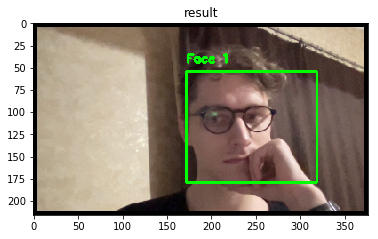

In [92]:
rects, detected_img = detect_face(attendeeFrames[1], True)
print_image(detected_img)

In [93]:
test = request.attendees[0]

In [94]:
test

X(userName=u'\u0412\u0430\u0434\u0438\u043c \u0410\u0440\u0434\u0430\u0441\u043e\u0432', userId=None, height=208, width=369, y=153, x=62)

AttributeError: 'X' object has no attribute 'test1'

In [97]:
import smartguard

In [98]:
with open('../samples/frame-message-sample-1.json', 'r', encoding='utf-8') as jsonFile:
    request2 = json2obj(jsonFile.read())

request2

X(sessionId=u'D589C4101B97474F8DDAAD35B5D76CED', attendees=[X(userName=u'\u0412\u0430\u0434\u0438\u043c \u0410\u0440\u0434\u0430\u0441\u043e\u0432', userId=None, height=208, width=369, y=153, x=62), X(userName=u'Angular2222', userId=None, height=216, width=377, y=149, x=431), X(userName=u'Olha Koshlata', userId=None, height=208, width=369, y=365, x=248)], filePath=u'/Users/ardasovvadim/dev/Workspaces/dotnet/SmartGuard/SmartGuar.WebApi.Host/sessions/D589C4101B97474F8DDAAD35B5D76CED/frames/frame_1669141057.jpg')

In [109]:
msg = smartguard.RecognitionResultMessage(type('',(object,),{'sessionId': ''})())
json.dumps(msg.__dict__)

'{"sessionId": "", "attendees": []}'

In [108]:
a =
a.foo

1